In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
ORIGINAL_PATH = '/home/ubuntu/Plant/data/'
PROC_PATH = '/home/ubuntu/Plant/data_seg/'

In [3]:
# TODO
# move labels.csv to proc path
# process train
# process test

In [4]:
import sys
LOCAL_FAST_AI = '/Users/krishnakalyan3/Educational/FastAI/fastai/'
AWS_FAST_AI = '/home/ubuntu/fastai'
sys.path.append(AWS_FAST_AI)

In [5]:
from fastai.transforms import * 
from fastai.conv_learner import * 
from fastai.model import *
from fastai.dataset import * 
from fastai.sgdr import *
from fastai.plots import *
from shutil import copyfile
import os
from PIL import Image

In [12]:
# Make sure you create train and test directory

In [6]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

In [7]:
def proc_new(PATH, DEST_PATH):
    image = cv2.imread(PATH, cv2.IMREAD_COLOR)
    image_seg = segment_plant(image)
    image_sharp = sharpen_image(image_seg)
    im = Image.fromarray(image_sharp)
    im.save(DEST_PATH)

In [8]:
def proc_dir(PATH_FROM, PATH_TO, root_folder):
    from_path_dir = PATH_FROM + root_folder
    to_path_dir = PATH_TO + root_folder
    sub_files = os.listdir(from_path_dir)
    
    for img in sub_files:
        DEST_PATH = PATH_TO+root_folder+img
        proc_new(from_path_dir+img, DEST_PATH)
        
    print('{} complete'.format(root_folder))

In [13]:
proc_dir(ORIGINAL_PATH, PROC_PATH, 'test/') 

test/ complete


In [59]:
def proc_data(PATH_FROM, PATH_TO):
    
    # Create proc dir
    os.makedirs(PATH_TO+'train', exist_ok=True)
    os.makedirs(PATH_TO+'test', exist_ok=True)
    
    # Copy meta files
    copy_meta = ['labels.csv']
    for i in copy_meta:
        copyfile(PATH_FROM+i, PATH_TO+i)
    
    # process dirs
    root_folders = ['train/', 'test/']
    for i in root_folders:
        proc_dir(PATH_FROM, PATH_TO, i)
        
    print('all complete')

In [60]:
proc_data(ORIGINAL_PATH, PROC_PATH)

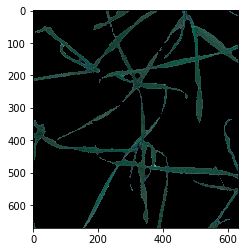

In [70]:
PATH_IMG = '/home/ubuntu/Plant/data_seg/train/7324d3cc4.png'
img = plt.imread(PATH_IMG)
plt.imshow(img)